
# Python İle Verilere Erişim 

**Merkez Bankası Elektronik Veri Dağıtım Sistemi’ne Kayıt**

    -Verileri merkez bankasının API sinden çekmeniz için öncelikle API anahtarna sahip olmalısınız . [https://evds2.tcmb.gov.tr/index.php?/evds/login]
    
    -Kayıt olduktan sonra API anahtarını alabilmek için  sırası ile ;
            
            *Profil Sayfanıza gidin
            
            *Progil Güncelleme sayfasının altındaki "API Anahtarı " Butonuna Tıklayın çıkan ekrandak size ait API anahtarınızızıalın . 
            
            *Bu anahtar kişiye özel ve tek olduğu için kaydetmenizi tavsiye ederim
    -Uygulamaya geçmeden önce Merkez Bankası’nda yer alan verilerle ilgili kısa bir bilgilendirme yapmakta fayda var. Merkez Bankası’ndaki veri grupları 2 başlık altında toplanmakta ve kodlanmaktadır. Bunlar; 
    
    Veri Grubu Kodu  Veri gruplarının aldığı koddur 
    Seri Kodu        Veri gruplarımızın içerisinde bulunan veri serilerinden oluşan veri setlerinin kodudur.



## Veri Çekmeden Önce Bilinmesi Gereken Terimler 


    Series ===

                series :  Seri kodları Gösterilir Birden fazla seçilmesi Durumunda seri sayısı kadar parametre alır seri kodları"-" ile ayrılır
                
                
    Tarih Parametreleri ===

                startDate: Başlangıç Tarihini Gösterir

                endDate: Bitiş Tarihini Gösterir
                
    Biçim Parametreleri ==

                type:  Web servislerin dönüşüm tipi csv,xml yada json objesi şeklindedir
                
    Gözlem Parametreleri ==

                **aggregationType:** Verinin toplama türünü gösteri aşağıdaki değerleri alır 
                         
                        ortalama : avg

                        en düşük : min

                        en yüksek : max

                        başlangıç: first

                        bitiş : last

                        kümülatif : sum
                        
    Frekans Parametreleri ==

                 frequency: verinin frekansını belirler 

                        günlük = 1

                        işgünü*=2

                        haftalık = 3

                        ayda 2 kez = 4

                        aylık = 5

                        3aylık = 6

                        6aylık = 7

                        yıllık = 8

    Formül Parametreleri ==

                **formulas:** Verinin hangi formüle göre çekileceğini belirler.

                        düzey: 0

                        yüzde değişim: 1

                        fark: 2

                        yıllık yüzde değişim: 3

                        yıllık fark: 4

                        bir önceki yılın sonuna göre yüzde değişim: 5

                        bir önceki yılın sonuna göre fark: 6

                        hareketli ortalama: 7

                        hareketli toplam 8 
                        
    Key ==
                key: kullanıcıya tanımlı API anahtarıdır her kullanıcı için farklıdır .

In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv

## Ana Veri Grubunun Başlıklarının Çekilmesi 
İlk olarak merkez bankası linkini formata uygun bir şekilde oluşturmak gerekmektedir. 

Key kısmı kişiye özel olduğundan bu örnekte verilememektedir.

Bu kısmı kendi keyiniz ile doldurmalısınız.


Örneğimizi sadeleştirmek için bazı kolonlar silinmiştir. Sizin için bu kolonlar önemli ise silmenize gerek yoktur.


In [64]:
ana_veri = pd.read_csv("https://evds2.tcmb.gov.tr/service/evds/datagroups/key=BURAYAKEYBİLGİNİZGELMELİ&mode=0&type=csv")
ana_veri.drop(["CATEGORY_ID","NOTE_ENG","METADATA_LINK","REV_POL_LINK_ENG",
         "UPPER_NOTE_ENG","APP_CHA_LINK_ENG","REV_POL_LINK","APP_CHA_LINK",
         "METADATA_LINK_ENG","DATAGROUP_NAME_ENG","UPPER_NOTE","DATASOURCE_ENG","NOTE"], 
          axis=1,inplace=True)

## Veri Grubu Başlıklarının Çekilmesi

Veri grubu kodlarından  “bie_kkhartut” kodunu alıp kod kısmına yazıyoruz.



In [65]:
alt_veri= pd.read_csv("https://evds2.tcmb.gov.tr/service/evds/serieList/key=BURAYAKEYBİLGİNİZGELMELİ&type=csv&code=bie_kkhartut")
#Veri setimizide istemediğimiz kolonları drop metodu ile atıyoruz
alt_veri.drop(["DATASOURCE_ENG","METADATA_LINK","REV_POL_LINK_ENG","APP_CHA_LINK_ENG","TAG_ENG","METADATA_LINK_ENG","DEFAULT_AGG_METHOD_STR","TAG","REV_POL_LINK","APP_CHA_LINK","DEFAULT_AGG_METHOD"],axis=1,inplace=True)

## Veri Setimizin Bulunduğu Kolona Ulaşmak  
Veri grubu kodlarından e ticaret kodunu "TP.KKHARTUT.KT50" alıp kod kısmına yazıyoruz 

In [66]:

data= pd.read_csv("https://evds2.tcmb.gov.tr/service/evds/serieList/key=BURAYAKEYBİLGİNİZGELMELİ&type=csv&code=TP.KKHARTUT.KT50")
data.drop(["DATASOURCE_ENG","METADATA_LINK","REV_POL_LINK_ENG","APP_CHA_LINK_ENG","TAG_ENG","METADATA_LINK_ENG","DEFAULT_AGG_METHOD_STR","TAG","REV_POL_LINK","APP_CHA_LINK","DEFAULT_AGG_METHOD"],axis=1,inplace=True)

## Veri Setimizi Oluşturmak  

In [67]:
series =data.loc[0,"SERIE_CODE"]
series_name=data.loc[0,"SERIE_NAME"]

#merkez bankası formatında yazılmalıdır.
startDate= "01-01-%202015"
endDate="08-12-%202020"
typee="csv"
key="BURAYAKEYBİLGİNİZGELMELİ"
aggregationTypes="sum"
formulas="0"
frequency = "5"

url= "https://evds2.tcmb.gov.tr/service/evds/series={}&startDate={}&endDate={}&type={}&key={}&aggregationTypes={}&formulas={}&frequency={}".format(series,startDate,endDate,typee,key,aggregationTypes,formulas,frequency)


a=pd.read_csv(url)

In [68]:
a.head()

,Tarih,TP_KKHARTUT_KT50,UNIXTIME
0,2015-1,5387887,"{""numberLong"":""1420066800""}"
1,2015-2,4009240,"{""numberLong"":""1422745200""}"
2,2015-3,3846028,"{""numberLong"":""1425164400""}"
3,2015-4,3793126,"{""numberLong"":""1427839200""}"
4,2015-5,5310126,"{""numberLong"":""1430431200""}"


# Dolar Kurunun Çekilmesi

Bir başka proje için gerçekleştirilmiştir.

In [69]:
series_1 = "TP.DK.USD.S.YTL"
series_name_1 = "Dolar_kuru"
startDate= "01-01-%202015"
endDate="08-12-%202020"
typee ="csv"
key = "BURAYAKEYBİLGİNİZGELMELİ"
aggregationTypes="avg"
formulas="0"
frequency = "5"
url1= "https://evds2.tcmb.gov.tr/service/evds/series={}&startDate={}&endDate={}&type={}&key={}&aggregationTypes={}&formulas={}&frequency={}".format(series_1,startDate,endDate,typee,key,aggregationTypes,formulas,frequency)

dolar = pd.read_csv(url1)

In [70]:
dolar.head()

,Tarih,TP_DK_USD_S_YTL,UNIXTIME
0,2015-1,2.332538,"{""numberLong"":""1420066800""}"
1,2015-2,2.459640,"{""numberLong"":""1422745200""}"
2,2015-3,2.588500,"{""numberLong"":""1425164400""}"
3,2015-4,2.652929,"{""numberLong"":""1427839200""}"
4,2015-5,2.650911,"{""numberLong"":""1430431200""}"


In [71]:
dolar.drop(columns={"Tarih"},axis=1,inplace=True)

In [72]:
data = pd.concat([a,dolar],axis=1,sort = False)

In [73]:
data.head()

,Tarih,TP_KKHARTUT_KT50,UNIXTIME,TP_DK_USD_S_YTL,UNIXTIME
0,2015-1,5387887,"{""numberLong"":""1420066800""}",2.332538,"{""numberLong"":""1420066800""}"
1,2015-2,4009240,"{""numberLong"":""1422745200""}",2.459640,"{""numberLong"":""1422745200""}"
2,2015-3,3846028,"{""numberLong"":""1425164400""}",2.588500,"{""numberLong"":""1425164400""}"
3,2015-4,3793126,"{""numberLong"":""1427839200""}",2.652929,"{""numberLong"":""1427839200""}"
4,2015-5,5310126,"{""numberLong"":""1430431200""}",2.650911,"{""numberLong"":""1430431200""}"


In [74]:
data.columns

Index(['Tarih', 'TP_KKHARTUT_KT50', 'UNIXTIME', 'TP_DK_USD_S_YTL', 'UNIXTIME'], dtype='object')

In [75]:
data.drop("UNIXTIME",axis=1,inplace=True)
data.rename(columns = {"TP_KKHARTUT_KT50":"Tl" , "TP_DK_USD_S_YTL":"Dolar"} , inplace = True)
data.tail()

,Tarih,Tl,Dolar
67,2020-8,21681003,7.265250
68,2020-9,24007046,7.521323
69,2020-10,29578499,7.888071
70,2020-11,27765955,8.017762
71,2020-12,12008683,7.839643


In [180]:
data.to_csv("mbe_ticaret_verisi.csv")

# Veri Setinin Dışarıdan Bilgisinin Alınması


In [78]:
df = pd.read_csv("mbe_ticaret_verisi.csv")
df.head()

,Unnamed: 0,Tarih,Tl,Dolar
0,0,2015-1,5387887,2.332538
1,1,2015-2,4009240,2.459640
2,2,2015-3,3846028,2.588500
3,3,2015-4,3793126,2.652929
4,4,2015-5,5310126,2.650911


In [79]:
print(f"Veri seti içerisinde Nan değer kontrolü \n {df.isnull().sum()} \n")
print("******************************")
print(df.info())

Veri seti içerisinde Nan değer kontrolü 
 Unnamed: 0    0
Tarih         0
Tl            0
Dolar         0
dtype: int64 

******************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  72 non-null     int64  
 1   Tarih       72 non-null     object 
 2   Tl          72 non-null     int64  
 3   Dolar       72 non-null     float64
dtypes: float64(1), int64(2), object(1)
memory usage: 2.0+ KB
None


In [80]:
print(f"Veri Setindeki Kolonların İsimleri = {df.columns}")

Veri Setindeki Kolonların İsimleri = Index(['Unnamed: 0', 'Tarih', 'Tl', 'Dolar'], dtype='object')


In [81]:
df.drop("Unnamed: 0",axis=1,inplace=True)
df.tail()

,Tarih,Tl,Dolar
67,2020-8,21681003,7.265250
68,2020-9,24007046,7.521323
69,2020-10,29578499,7.888071
70,2020-11,27765955,8.017762
71,2020-12,6369224,7.845385


In [82]:
df.shape

(72, 3)

In [83]:
df["Dolar"] = round(df.Dolar,2)

In [84]:
df.head()

,Tarih,Tl,Dolar
0,2015-1,5387887,2.33
1,2015-2,4009240,2.46
2,2015-3,3846028,2.59
3,2015-4,3793126,2.65
4,2015-5,5310126,2.65


In [85]:
import seaborn as sns

# 2015 Yılı Görselleştirme

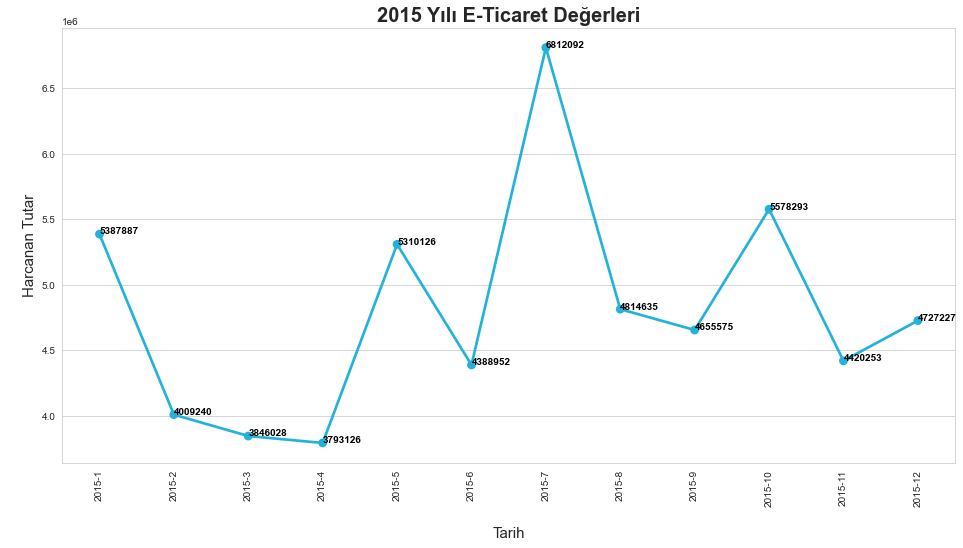

In [86]:
# Görselleştirme
#Grafiğimizin Boyutu
plt.figure(figsize=(16,8))
#çizimi
sns.set_style("whitegrid")
p1 = sns.pointplot(x=df.Tarih.iloc[:12],
              y=df["Tl"].iloc[:12],
              color='#22b2da',
              alpha=0.5)
#grafik üzerine değerlerin yazılması
for line in range(0,12):
     p1.text(line, df["Tl"].iloc[line], df["Tl"].iloc[line], 
             horizontalalignment='left', size='medium', color='black', weight='semibold' )
#x eksenimizdeki yazıları 90 derece açıyla yazdırdık.
plt.xticks(rotation= 90)
# x ve y eksenimizi isimlendirdik.
plt.xlabel('\nTarih',fontsize = 15)
plt.ylabel("\nHarcanan Tutar",fontsize = 15)
plt.title("2015 Yılı E-Ticaret Değerleri",fontsize = 20, weight='semibold')

plt.show()

# 2016 Yılı Görselleştirme

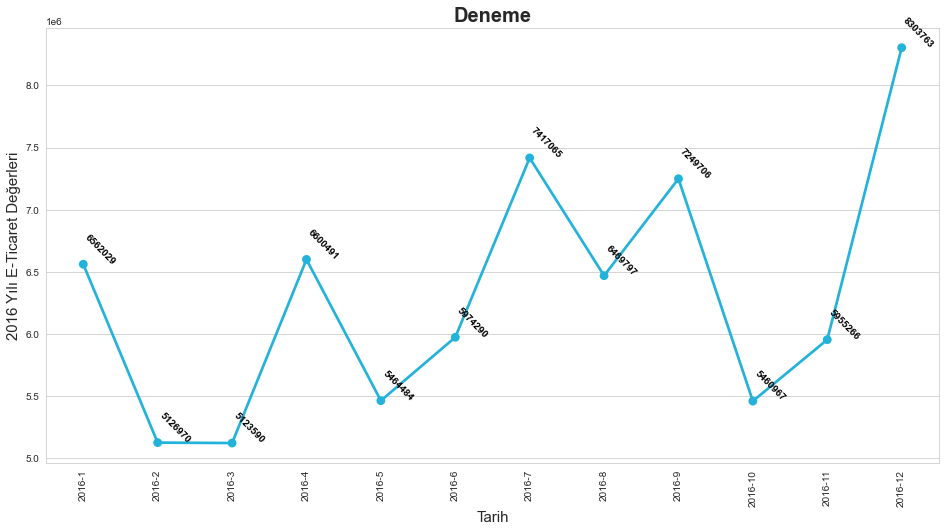

In [87]:
# Görselleştirme
#Grafiğimizin Boyutu
plt.figure(figsize=(16,8))
#çizimi
sns.set_style("whitegrid")
onalti = df.iloc[12:24]
p1 = sns.pointplot(x=onalti.Tarih,
              y=onalti["Tl"],
              color='#22b2da',
              alpha=0.5)
#grafik üzerine değerlerin yazılması
for line in range(0,12):
     p1.text(line, onalti["Tl"].iloc[line], onalti["Tl"].iloc[line], 
             horizontalalignment='left', size='medium', color='black', weight='semibold',rotation = -45 )
#x eksenimizdeki yazıları 90 derece açıyla yazdırdık.
plt.xticks(rotation= 90)
# x ve y eksenimizi isimlendirdik.
plt.xlabel('Tarih',fontsize = 15)
plt.ylabel("2016 Yılı E-Ticaret Değerleri",fontsize = 15)

plt.title("Deneme",fontsize = 20, weight='semibold')
plt.show()

# 2017 Yılı Görselleştirmesi

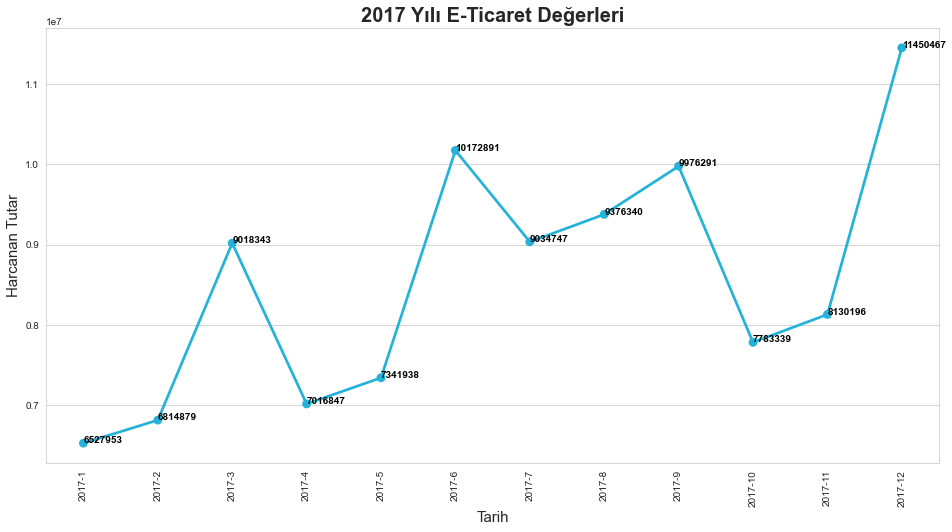

In [88]:

plt.figure(figsize=(16,8))
onyedi=df.iloc[24:36]
sns.set_style("whitegrid")
p1 = sns.pointplot(x=onyedi.Tarih,
              y=onyedi["Tl"],
              color='#22b2da',
              alpha=0.5)

for line in range(0,12):
     p1.text(line, onyedi["Tl"].iloc[line], onyedi["Tl"].iloc[line], 
             horizontalalignment='left', size='medium', color='black', weight='semibold' )

plt.xticks(rotation= 90)

plt.xlabel('Tarih',fontsize = 15)
plt.ylabel("Harcanan Tutar",fontsize = 15)
plt.title("2017 Yılı E-Ticaret Değerleri",fontsize = 20, weight='semibold')
plt.show()

# 2018 Yılı Görselleştirme

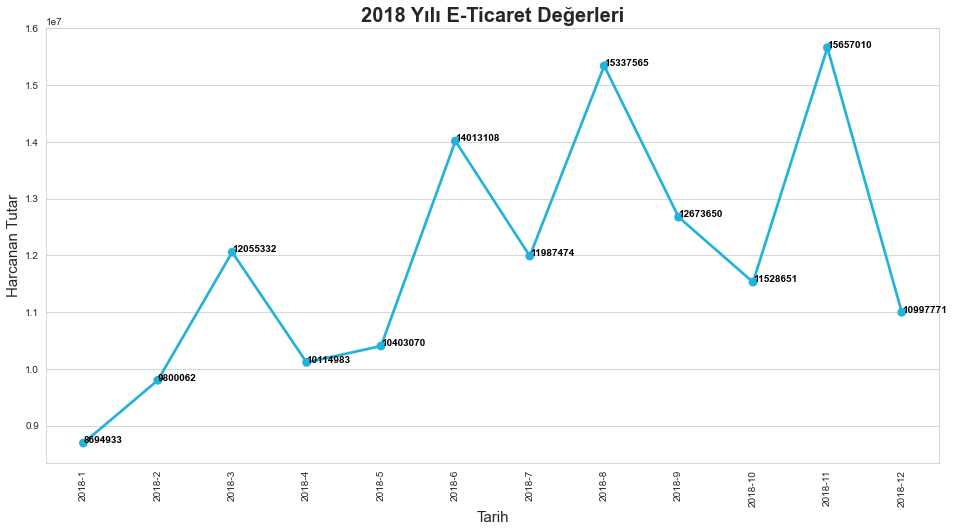

In [89]:
plt.figure(figsize=(16,8))
onsekiz=df.iloc[36:48]
sns.set_style("whitegrid")
p1 = sns.pointplot(x=onsekiz.Tarih,
              y=onsekiz["Tl"],
              color='#22b2da',
              alpha=0.5)

for line in range(0,12):
     p1.text(line, onsekiz["Tl"].iloc[line], onsekiz["Tl"].iloc[line], 
             horizontalalignment='left', size='medium', color='black', weight='semibold' )

plt.xticks(rotation= 90)

plt.xlabel('Tarih',fontsize = 15)
plt.ylabel("Harcanan Tutar",fontsize = 15)
plt.title("2018 Yılı E-Ticaret Değerleri",fontsize = 20, weight='semibold')
plt.show()

# 2019 Yılı Görselleştirme

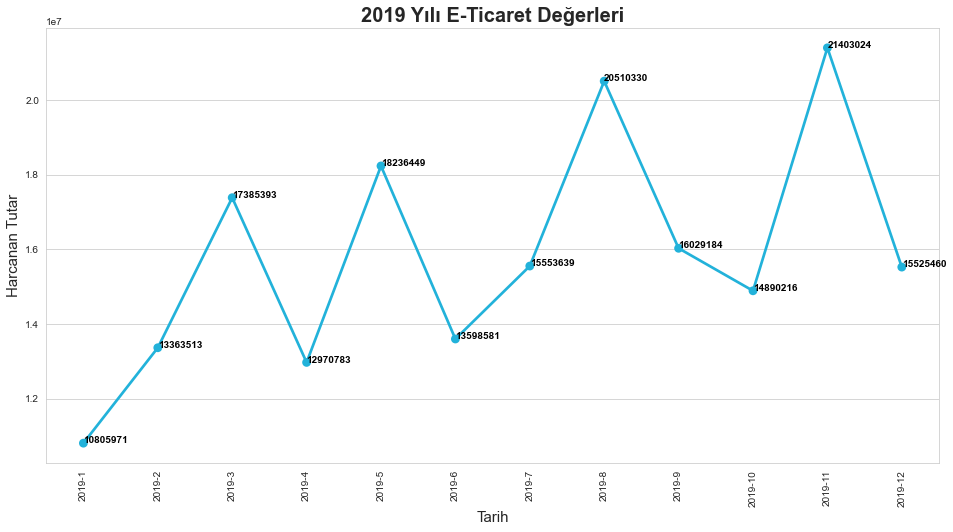

In [90]:
plt.figure(figsize=(16,8))
ondokuz=df.iloc[48:60]
sns.set_style("whitegrid")
p1 = sns.pointplot(x=ondokuz.Tarih,
              y=ondokuz["Tl"],
              color='#22b2da',
              alpha=0.5)

for line in range(0,12):
     p1.text(line, ondokuz["Tl"].iloc[line], ondokuz["Tl"].iloc[line], 
             horizontalalignment='left', size='medium', color='black', weight='semibold' )

plt.xticks(rotation= 90)

plt.xlabel('Tarih',fontsize = 15)
plt.ylabel("Harcanan Tutar",fontsize = 15)
plt.title("2019 Yılı E-Ticaret Değerleri",fontsize = 20, weight='semibold')
plt.show()

# 2020 Yılı Görselleştirme

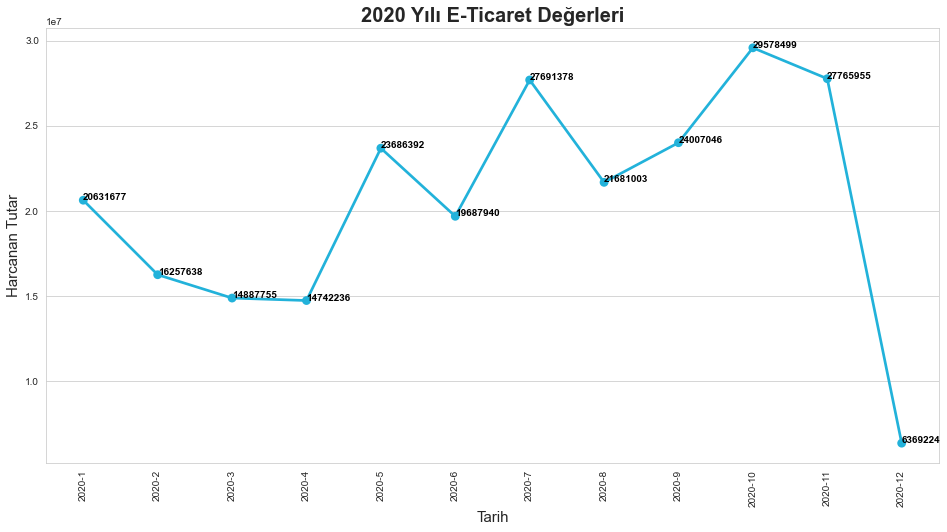

In [91]:
plt.figure(figsize=(16,8))
yirmi=df.iloc[60:72]
sns.set_style("whitegrid")
p1 = sns.pointplot(x=yirmi.Tarih,
              y=yirmi["Tl"],
              color='#22b2da',
              alpha=0.5)

for line in range(0,12):
     p1.text(line, yirmi["Tl"].iloc[line], yirmi["Tl"].iloc[line], 
             horizontalalignment='left', size='medium', color='black', weight='semibold' )

plt.xticks(rotation= 90)

plt.xlabel('Tarih',fontsize = 15)
plt.ylabel("Harcanan Tutar",fontsize = 15)
plt.title("2020 Yılı E-Ticaret Değerleri",fontsize = 20, weight='semibold')
plt.show()

# 2015-2020 Genel Görselleştirme

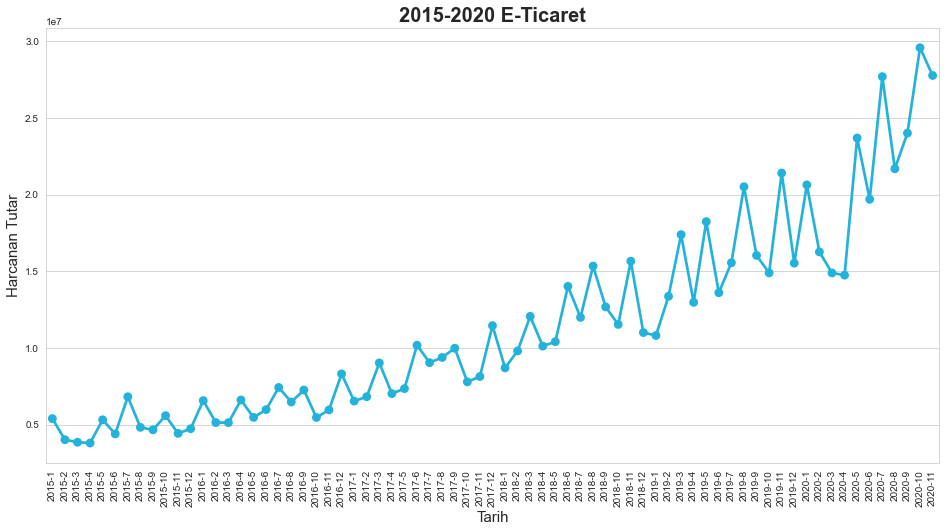

In [92]:
plt.figure(figsize=(16,8))

sns.set_style("whitegrid")
p1 = sns.pointplot(x=df.Tarih.iloc[:71],
              y=df["Tl"].iloc[:71],
              color='#22b2da',
              alpha=0.5)


plt.xticks(rotation= 90)

plt.xlabel('Tarih',fontsize = 15)
plt.ylabel("Harcanan Tutar",fontsize = 15)

plt.title("2015-2020 E-Ticaret",fontsize = 20, weight='semibold')

plt.show()

<Figure size 864x432 with 0 Axes>

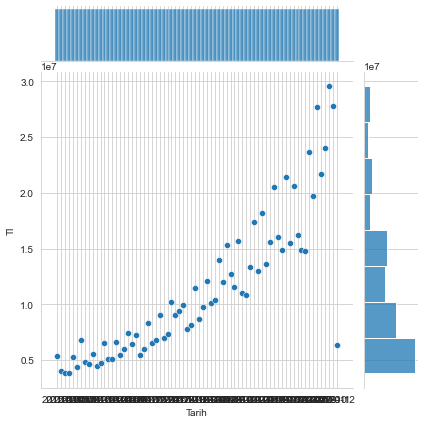

In [93]:
plt.figure(figsize=(12,6))
sns.jointplot(x ="Tarih",y="Tl", data = df)

In [94]:
kur = (df.Dolar.iloc[70]/df.Dolar.iloc[0])
print(f"Dolar 2015-2020 arasında dolar kuru '{round(kur,2)}' kat artmıştır artmış")

Dolar 2015-2020 arasında dolar kuru '3.44' kat artmıştır artmış


In [95]:
fark = (df.Tl.iloc[70]/df.Tl.iloc[0])
print(f"Türk insanının 2015-202 arasında E-Ticaret Harcamaları '{round(fark,2)}' kat artmıştır")

Türk insanının 2015-202 arasında E-Ticaret Harcamaları '5.15' kat artmıştır


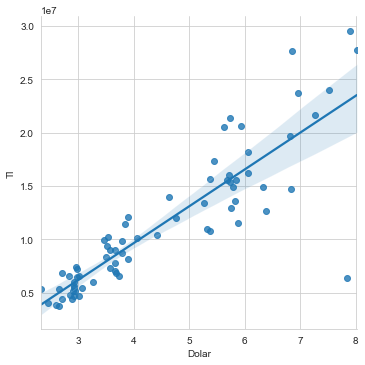

In [96]:
sns.lmplot(x='Dolar', y='Tl', data=df)

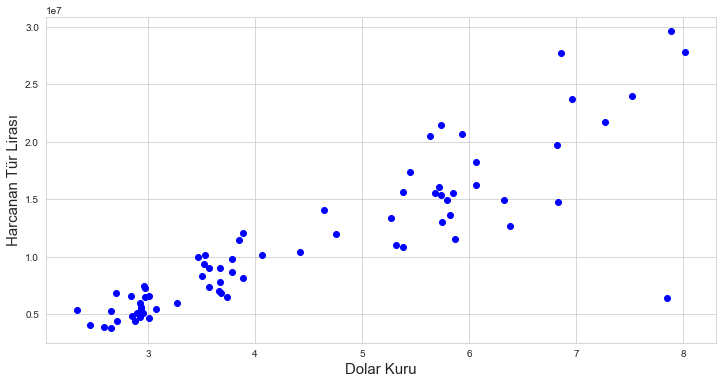

In [97]:
plt.figure(figsize=(12,6))
plt.scatter(df["Dolar"],df["Tl"] , color="blue")
plt.xlabel("Dolar Kuru",fontsize = 15)
plt.ylabel("Harcanan Tür Lirası",fontsize = 15)
plt.show()

In [98]:
df = df.iloc[:70]

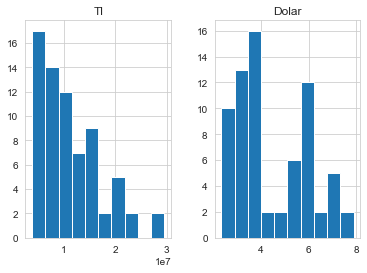

In [99]:
df.hist()
plt.show()

In [100]:
# Train Test Split
random = np.random.rand(len(df)) < 0.8

train = df[random]
test = df[~random]
print(f"Eğitim Setinin Boyutu = {train.shape}")
print(f"Test Setinin Boyutu = {test.shape}")

Eğitim Setinin Boyutu = (59, 3)
Test Setinin Boyutu = (11, 3)


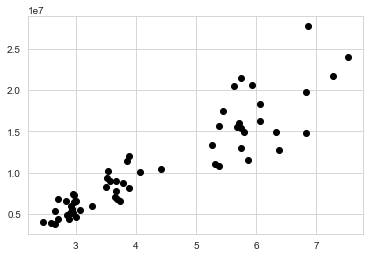

In [101]:
# Test Veri Setinin Dağılımı
plt.scatter(train.Dolar,train.Tl , color = "black")
plt.show()

## Modelling


In [103]:
from sklearn import linear_model
import sklearn.metrics as sm
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[["Tl"]])
train_y = np.asanyarray(train[["Dolar"]])

regr.fit(train_x,train_y)

print(f"Coefficients : {regr.coef_}")
print(f"Intercept: {regr.intercept_}")


Coefficients : [[2.32890741e-07]]
Intercept: [1.81544064]


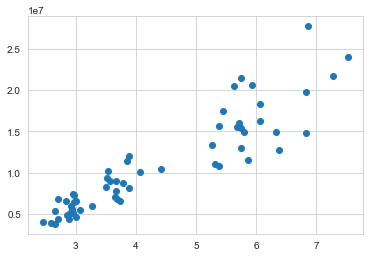

In [104]:
plt.scatter(train.Dolar,train.Tl)
plt.show()

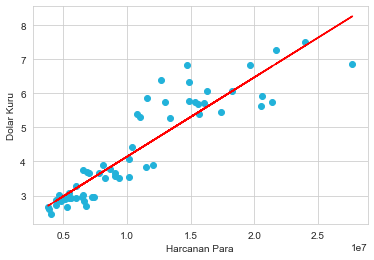

In [105]:

plt.scatter(train.Tl, train.Dolar,  color='#22b2da')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Harcanan Para")
plt.ylabel("Dolar Kuru")
plt.show()

In [111]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[["Tl"]])
test_y = np.asanyarray(test[["Dolar"]])
test_y_ = regr.predict(test_x)

print(f"Mean absolute error (MAE) : {round(np.mean(np.absolute(test_y_-test_y)),2)}")
print(f"Residual sum of Squares (MSE) : {round(np.mean((test_y_-test_y)**2),2)}")
print("Explain variance score =", round(sm.explained_variance_score(test_y, test_y_), 2)) 
print(f"R^2 - score : {round(r2_score(test_y,test_y_),3)}")

Mean absolute error (MAE) : 0.44
Residual sum of Squares (MSE) : 0.27
Explain variance score = 0.91
R^2 - score : 0.901
